In [22]:
from pathlib import Path
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os
from pathlib import Path

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")


# Set figure parameters
fig_width = 3.25 #ECS spec is 3.25" width
fig_width_2col_inches = 7
fig_width_3col_inches = 10
fig_height = (3/4)*fig_width # standard ratio

rcParams['figure.autolayout'] = True
rcParams['lines.linewidth'] = 1.0
rcParams['font.size'] = 8
rcParams['font.sans-serif'] = 'Arial'
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Arial'
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

rcParams['lines.markersize'] = 5
rcParams['legend.fontsize'] = 7
rcParams['legend.frameon'] = False
rcParams['xtick.bottom'] = False
rcParams['ytick.direction'] = 'in' 



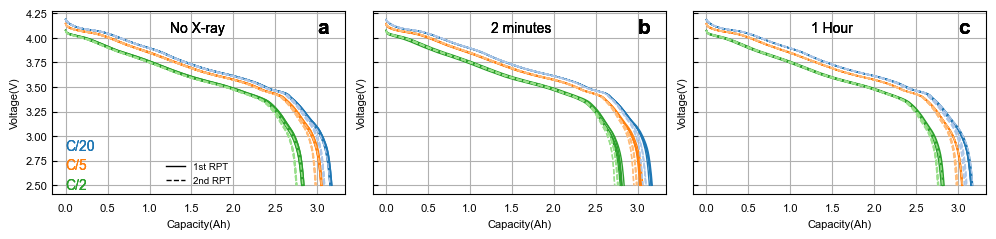

In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 폴더 경로를 설정합니다.
script_dir = os.getcwd()

folder_No_1st = os.path.join(script_dir, '1-No x-ray(1-5)/1st RPT')
folder_No_2nd = os.path.join(script_dir, '1-No x-ray(1-5)/2nd RPT')

folder_2_minutes_1st = os.path.join(script_dir, '2-2m damage(6-10)/1st RPT')
folder_2_minutes_2nd = os.path.join(script_dir, '2-2m damage(6-10)/2nd RPT')

folder_1_Hour_1st = os.path.join(script_dir, '3-1H damage(11-15)/1st RPT')
folder_1_Hour_2nd = os.path.join(script_dir, '3-1H damage(11-15)/2nd RPT')

def filter_data(df, step_index):
    filtered_df = df[df['Step Index'].isin([step_index])]
    filtered_df.reset_index(drop=True, inplace=True)
    voltage_data = filtered_df['Voltage(V)']
    capacity_data = filtered_df['Capacity(Ah)']
    return voltage_data, capacity_data, filtered_df

# 현대적이고 이쁜 색상 세 가지와 채도를 낮춘 색상 세 가지를 선정합니다.
colors_1st = ['#1f77b4', '#ff7f0e', '#2ca02c']  # 모던한 색상
colors_2nd = ['#aec7e8', '#ffbb78', '#98df8a']  # 채도를 낮춘 색상

fig, axes = plt.subplots(1, 3, figsize=(fig_width_3col_inches, fig_height), sharey=True)

# 첫 번째 폴더의 모든 엑셀 파일을 불러옵니다.
for filename in os.listdir(folder_No_1st):
    if filename.endswith('.xlsx'):
        filepath = os.path.join(folder_No_1st, filename)
        df = pd.read_excel(filepath, header=0, sheet_name='record')
        
    for i, step_index in enumerate([6, 10, 14]):
        voltage_data, capacity_data, filtered_df = filter_data(df, step_index)
        axes[0].plot(capacity_data, voltage_data, linestyle='-', linewidth=1, color=colors_1st[i])

# 두 번째 폴더의 모든 엑셀 파일을 불러옵니다.
for filename in os.listdir(folder_No_2nd):
    if filename.endswith('.xlsx'):
        filepath = os.path.join(folder_No_2nd, filename)
        df = pd.read_excel(filepath, header=0, sheet_name='record')
        
    for i, step_index in enumerate([6, 10, 14]):
        voltage_data, capacity_data, filtered_df = filter_data(df, step_index)
        axes[0].plot(capacity_data, voltage_data, linestyle='--', linewidth=1, color=colors_2nd[i])

# 세 번째 폴더의 모든 엑셀 파일을 불러옵니다.
for filename in os.listdir(folder_2_minutes_1st):
    if filename.endswith('.xlsx'):
        filepath = os.path.join(folder_2_minutes_1st, filename)
        df = pd.read_excel(filepath, header=0, sheet_name='record')
        
    for i, step_index in enumerate([6, 10, 14]):
        voltage_data, capacity_data, filtered_df = filter_data(df, step_index)
        axes[1].plot(capacity_data, voltage_data, linestyle='-', linewidth=1, color=colors_1st[i])

# 네 번째 폴더의 모든 엑셀 파일을 불러옵니다.
for filename in os.listdir(folder_2_minutes_2nd):
    if filename.endswith('.xlsx'):
        filepath = os.path.join(folder_2_minutes_2nd, filename)
        df = pd.read_excel(filepath, header=0, sheet_name='record')
        
    for i, step_index in enumerate([6, 10, 14]):
        voltage_data, capacity_data, filtered_df = filter_data(df, step_index)
        axes[1].plot(capacity_data, voltage_data, linestyle='--', linewidth=1, color=colors_2nd[i])

# 다섯 번째 폴더의 모든 엑셀 파일을 불러옵니다.
for filename in os.listdir(folder_1_Hour_1st):
    if filename.endswith('.xlsx'):
        filepath = os.path.join(folder_1_Hour_1st, filename)
        df = pd.read_excel(filepath, header=0, sheet_name='record')
        
    for i, step_index in enumerate([6, 10, 14]):
        voltage_data, capacity_data, filtered_df = filter_data(df, step_index)
        axes[2].plot(capacity_data, voltage_data, linestyle='-', linewidth=1, color=colors_1st[i])

# 여섯 번째 폴더의 모든 엑셀 파일을 불러옵니다.
for filename in os.listdir(folder_1_Hour_2nd):
    if filename.endswith('.xlsx'):
        filepath = os.path.join(folder_1_Hour_2nd, filename)
        df = pd.read_excel(filepath, header=0, sheet_name='record')
        
    for i, step_index in enumerate([6, 10, 14]):
        voltage_data, capacity_data, filtered_df = filter_data(df, step_index)
        axes[2].plot(capacity_data, voltage_data, linestyle='--', linewidth=1, color=colors_2nd[i])

step_titles = ['No X-ray', '2 minutes', '1 Hour']
for i, ax in enumerate(axes):
    # ax.set_title(step_titles[i])
    ax.set_xlabel('Capacity(Ah)')
    ax.set_ylabel('Voltage(V)')
    ax.grid(True)

    axes[0].text(3, 4.1, 'a', fontsize=15, fontweight='bold', ha='left', va='center')
    axes[1].text(3, 4.1, 'b', fontsize=15, fontweight='bold', ha='left', va='center')
    axes[2].text(3, 4.1, 'c', fontsize=15, fontweight='bold', ha='left', va='center')
    axes[0].text(1.25, 4.1, 'No X-ray', fontsize=10, ha='left', va='center')
    axes[1].text(1.25, 4.1, '2 minutes', fontsize=10, ha='left', va='center')
    axes[2].text(1.25, 4.1, '1 Hour', fontsize=10, ha='left', va='center')

    axes[0].text(-0, 2.9, 'C/20', color= '#1f77b4', fontsize=10, ha='left', va='center')
    axes[0].text(-0, 2.7, 'C/5', color= '#ff7f0e', fontsize=10, ha='left', va='center')
    axes[0].text(-0, 2.5, 'C/2', color= '#2ca02c', fontsize=10, ha='left', va='center')

axes[0].plot([], [], linestyle='-', linewidth=1, color='black', label='1st RPT')
axes[0].plot([], [], linestyle='--', linewidth=1, color='black', label='2nd RPT')
axes[0].legend(facecolor='white', loc='lower center')
plt.savefig("SI Fig2.pdf", dpi=300, bbox_inches="tight", format="pdf")
plt.tight_layout()
plt.show()

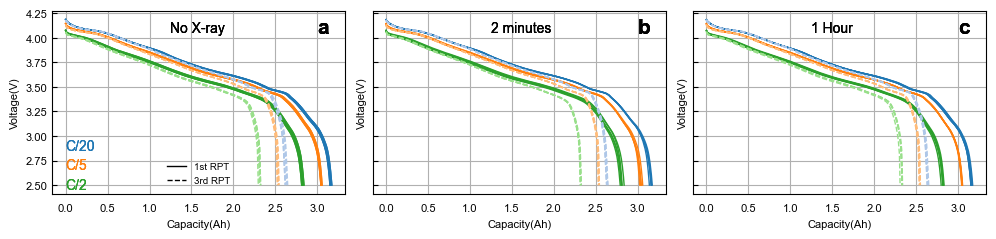

In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 폴더 경로를 설정합니다.
script_dir = os.getcwd()


folder_No_1st = os.path.join(script_dir, '1-No x-ray(1-5)/1st RPT')
folder_No_3rd = os.path.join(script_dir, '1-No x-ray(1-5)/3rd RPT')

folder_2_minutes_1st = os.path.join(script_dir, '2-2m damage(6-10)/1st RPT')
folder_2_minutes_3rd = os.path.join(script_dir, '2-2m damage(6-10)/3rd RPT')

folder_1_Hour_1st = os.path.join(script_dir, '3-1H damage(11-15)/1st RPT')
folder_1_Hour_3rd = os.path.join(script_dir, '3-1H damage(11-15)/3rd RPT')

def filter_data(df, step_index):
    filtered_df = df[df['Step Index'].isin([step_index])]
    filtered_df.reset_index(drop=True, inplace=True)
    voltage_data = filtered_df['Voltage(V)']
    capacity_data = filtered_df['Capacity(Ah)']
    return voltage_data, capacity_data, filtered_df

# 현대적이고 이쁜 색상 세 가지와 채도를 낮춘 색상 세 가지를 선정합니다.
colors_1st = ['#1f77b4', '#ff7f0e', '#2ca02c']  # 모던한 색상
colors_2nd = ['#aec7e8', '#ffbb78', '#98df8a']  # 채도를 낮춘 색상

fig, axes = plt.subplots(1, 3, figsize=(fig_width_3col_inches, fig_height), sharey=True)

# 첫 번째 폴더의 모든 엑셀 파일을 불러옵니다.
for filename in os.listdir(folder_No_1st):
    if filename.endswith('.xlsx'):
        filepath = os.path.join(folder_No_1st, filename)
        df = pd.read_excel(filepath, header=0, sheet_name='record')
        
    for i, step_index in enumerate([6, 10, 14]):
        voltage_data, capacity_data, filtered_df = filter_data(df, step_index)
        axes[0].plot(capacity_data, voltage_data, linestyle='-', linewidth=1, color=colors_1st[i])

# 두 번째 폴더의 모든 엑셀 파일을 불러옵니다.
for filename in os.listdir(folder_No_3rd):
    if filename.endswith('.xlsx'):
        filepath = os.path.join(folder_No_3rd, filename)
        df = pd.read_excel(filepath, header=0, sheet_name='record')
        
    for i, step_index in enumerate([6, 10, 14]):
        voltage_data, capacity_data, filtered_df = filter_data(df, step_index)
        axes[0].plot(capacity_data, voltage_data, linestyle='--', linewidth=1, color=colors_2nd[i])

# 세 번째 폴더의 모든 엑셀 파일을 불러옵니다.
for filename in os.listdir(folder_2_minutes_1st):
    if filename.endswith('.xlsx'):
        filepath = os.path.join(folder_2_minutes_1st, filename)
        df = pd.read_excel(filepath, header=0, sheet_name='record')
        
    for i, step_index in enumerate([6, 10, 14]):
        voltage_data, capacity_data, filtered_df = filter_data(df, step_index)
        axes[1].plot(capacity_data, voltage_data, linestyle='-', linewidth=1, color=colors_1st[i])

# 네 번째 폴더의 모든 엑셀 파일을 불러옵니다.
for filename in os.listdir(folder_2_minutes_3rd):
    if filename.endswith('.xlsx'):
        filepath = os.path.join(folder_2_minutes_3rd, filename)
        df = pd.read_excel(filepath, header=0, sheet_name='record')
        
    for i, step_index in enumerate([6, 10, 14]):
        voltage_data, capacity_data, filtered_df = filter_data(df, step_index)
        axes[1].plot(capacity_data, voltage_data, linestyle='--', linewidth=1, color=colors_2nd[i])

# 다섯 번째 폴더의 모든 엑셀 파일을 불러옵니다.
for filename in os.listdir(folder_1_Hour_1st):
    if filename.endswith('.xlsx'):
        filepath = os.path.join(folder_1_Hour_1st, filename)
        df = pd.read_excel(filepath, header=0, sheet_name='record')
        
    for i, step_index in enumerate([6, 10, 14]):
        voltage_data, capacity_data, filtered_df = filter_data(df, step_index)
        axes[2].plot(capacity_data, voltage_data, linestyle='-', linewidth=1, color=colors_1st[i])

# 여섯 번째 폴더의 모든 엑셀 파일을 불러옵니다.
for filename in os.listdir(folder_1_Hour_3rd):
    if filename.endswith('.xlsx'):
        filepath = os.path.join(folder_1_Hour_3rd, filename)
        df = pd.read_excel(filepath, header=0, sheet_name='record')
        
    for i, step_index in enumerate([6, 10, 14]):
        voltage_data, capacity_data, filtered_df = filter_data(df, step_index)
        axes[2].plot(capacity_data, voltage_data, linestyle='--', linewidth=1, color=colors_2nd[i])

step_titles = ['No X-ray', '2 minutes', '1 Hour']
for i, ax in enumerate(axes):
    # ax.set_title(step_titles[i])
    ax.set_xlabel('Capacity(Ah)')
    ax.set_ylabel('Voltage(V)')
    ax.grid(True)
    
    axes[0].text(3, 4.1, 'a', fontsize=15, fontweight='bold', ha='left', va='center')
    axes[1].text(3, 4.1, 'b', fontsize=15, fontweight='bold', ha='left', va='center')
    axes[2].text(3, 4.1, 'c', fontsize=15, fontweight='bold', ha='left', va='center')
    
    axes[0].text(1.25, 4.1, 'No X-ray', fontsize=10, ha='left', va='center')
    axes[1].text(1.25, 4.1, '2 minutes', fontsize=10, ha='left', va='center')
    axes[2].text(1.25, 4.1, '1 Hour', fontsize=10, ha='left', va='center')

    axes[0].text(-0, 2.9, 'C/20', color= '#1f77b4', fontsize=10, ha='left', va='center')
    axes[0].text(-0, 2.7, 'C/5', color= '#ff7f0e', fontsize=10, ha='left', va='center')
    axes[0].text(-0, 2.5, 'C/2', color= '#2ca02c', fontsize=10, ha='left', va='center')
axes[0].plot([], [], linestyle='-', linewidth=1, color='black', label='1st RPT')
axes[0].plot([], [], linestyle='--', linewidth=1, color='black', label='3rd RPT')
axes[0].legend(facecolor='white',loc='lower center')
plt.savefig("Si Fig3.pdf", dpi=300, bbox_inches="tight", format="pdf")
plt.tight_layout()
plt.show()